In [1]:
from velocity import get
from velocity.velocity_data import rotational_data
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import h5py
import csv
import os

In [2]:
with h5py.File('galaxy_population_data_'+str(2)+'.hdf5', 'r') as f:
    ids = f['ids'][:]

Galaxy ID: 	Galaxy Number: 


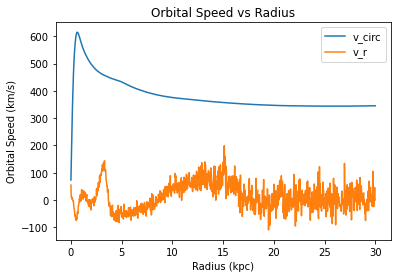

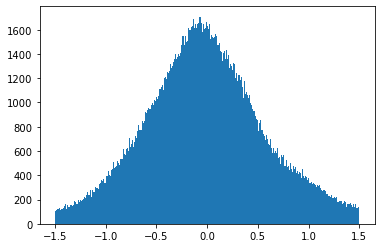

4562		1.0275753


In [5]:
#os.remove("galaxy_num.csv")
print("Galaxy ID: " + "\tGalaxy Number: ")
with open('galaxy_num.csv', 'w',newline='') as f:
    fieldnames = ['Galaxy ID', 'Galaxy Number']
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
 
    id = ids[22]

    r, vel_circ, v_r, e_v, bins, mass_num = rotational_data(id)

    plt.plot(r,vel_circ, label = "v_circ")
    plt.plot(r,v_r, label = "v_r")

    plt.legend()

    plt.xlabel("Radius (kpc)")
    plt.ylabel("Orbital Speed (km/s)")
    plt.title("Orbital Speed vs Radius")
    plt.savefig("OrbitalVel_tot.png",dpi=200)

    plt.show()

    plt.hist(e_v,bins=bins)
    plt.show()

    print(str(id) + "\t\t" + str(mass_num))

    #writer.writerow({'Galaxy ID': str(id), 'Galaxy Number': str(mass_num)})
       
    f.close()